<div style="
    display: flex;
    justify-content: center;
    align-items: center;
    width: 70%;
    margin: 40px auto;
    border-radius: 12px;
    background: linear-gradient(45deg, #ff6a00, #ffcc00, #ff00aa, #00fff2, #ff6a00);
    background-size: 300% 300%;
    animation: borderFlow 6s linear infinite;
    padding: 2px; /* bordure fine autour du orange */
    box-sizing: border-box;
">
    <!-- Bloc intérieur -->
    <div style="
        display: flex;
        align-items: center;
        justify-content: center;
        flex-wrap: wrap;
        background: linear-gradient(90deg, #ff7b00ff, #ff9500);
        color: white;
        font-family: 'Segoe UI', Arial, sans-serif;
        font-size: 28px;
        font-weight: 600;
        letter-spacing: 2px;
        padding: 20px 40px;
        border-radius: 10px; /* légèrement inférieur au parent */
        text-transform: uppercase;
        box-shadow: inset 0 0 0 0 rgba(0,0,0,0), 0 3px 8px rgba(0,0,0,0.25);
        width: 100%;
        height: 100%;
        box-sizing: border-box;
    ">
        <img src="assets/img/bottleneck.png" 
             alt="Logo Bottleneck" 
             style="height: 120px; width: auto; filter: drop-shadow(0 0 6px rgba(0,0,0,0.3)); margin-right: 25px;">
        <div style="text-align: center;">
            Analyse du stock et des ventes du site<br>
            Bottleneck
        </div>
    </div>
</div>

<style>
@keyframes borderFlow {
  0% { background-position: 0% 50%; }
  50% { background-position: 100% 50%; }
  100% { background-position: 0% 50%; }
}
</style>

# 🎯 Objectif du projet — Bottleneck 🍷

Ce notebook a pour objectif de **centraliser, nettoyer et analyser les données de ventes et de stocks de l’entreprise Bottleneck**, afin d’en extraire des **insights pertinents pour le comité de direction (CODIR)**.

---

## 🧩 Contexte

L’entreprise Bottleneck utilise actuellement plusieurs sources de données indépendantes :
- Une **extraction de l’ERP** (références produits, prix, état du stock),
- Une **extraction du site Web** (SKU, quantités vendues, descriptions produits, etc.),
- Une **table de liaison** permettant de relier les références entre les deux systèmes.

Cependant, des divergences existent entre ces fichiers (erreurs de saisie, types de données incohérents, références non correspondantes), rendant les analyses complexes.

---

## 📈 Objectifs principaux

Le travail se décompose en deux phases :

### Phase 1 — Agrégation et fiabilisation des données
- Rapprocher les extractions **ERP** et **Web** via la table de liaison,  
- Identifier les **erreurs et incohérences** dans les données (saisie, calcul, jointure, etc.),  
- Proposer des **solutions d’amélioration** pour fiabiliser les données en amont.

### Phase 2 — Analyses statistiques et interprétation
- Calcul du **chiffre d’affaires total et par produit**,  
- Détection et visualisation des **valeurs aberrantes** (Z-Score, écart interquartile, boxplot),  
- Étude du **taux de marge**, de la **rotation des stocks** et des **mois de couverture**,  
- Analyse des **corrélations** entre les variables quantitatives : prix, prix d’achat, stock, ventes, marge, etc.

---

## 🧠 Finalité

Les résultats présentés dans ce notebook serviront :
- À alimenter la **prise de décision du CODIR**,  
- À préparer la **future refonte du système de data visualisation**,  
- Et à définir une **base de données conforme et cohérente**, respectant les exigences **RGPD**.

---

> 💡 *L’ensemble de cette étude a été menée dans une optique de clarté, de rigueur et de reproductibilité, afin d’offrir à Bottleneck une vision fiable de ses performances commerciales.*


<a id="top"></a>

<h2 style="color:RGB(51,165,182);">📘 Sommaire</h2>

<ul style="list-style:none; line-height:1.8; font-size:17px; padding-left:0;">
  <li>
    <a href="#etape1" style="color:RGB(51,165,182); text-decoration:none;">
      <img src="assets/img/house-solid-full.svg" width="15" style="vertical-align:middle; margin-right:6px; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
      Étape 1 - Importation des librairies et chargement des fichiers
    </a>
    <ul style="list-style:none; margin-left:20px;">
      <li><a href="#etape1_1" style="color:RGB(51,165,182); text-decoration:none;">📘 1.1 - Importation des librairies</a></li>
      <li><a href="#etape1_2" style="color:RGB(51,165,182); text-decoration:none;">📗 1.2 - Chargement des fichiers</a></li>
    </ul>
  </li>

  <li>
    <a href="#etape2" style="color:RGB(51,165,182); text-decoration:none;">
      <img src="assets/img/house-solid-full.svg" width="15" style="vertical-align:middle; margin-right:6px; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
      Étape 2 - Analyse exploratoire des fichiers
    </a>
    <ul style="list-style:none; margin-left:20px;">
      <li><a href="#etape1_2" style="color:RGB(51,165,182); text-decoration:none;">📊 2.1 - Analyse exploratoire du fichier erp.xlsx</a></li>
      <li><a href="#etape1_1" style="color:RGB(51,165,182); text-decoration:none;">📊 2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</a></li>
      <ul style="margin-left:20px; list-style:none;">
        <li><a href="#etape2_1_1" style="color:RGB(51,165,182); text-decoration:none;">🔹 2.1.1.1 - Analyse de la variable PRIX</a></li>
        <li><a href="#etape2_1_1_2" style="color:RGB(51,165,182); text-decoration:none;">🔹 2.1.1.2 - Analyse de la variable STOCK</a></li>
        <li><a href="#etape2_1_1_3" style="color:RGB(51,165,182); text-decoration:none;">🔹 2.1.1.3 - Analyse de la variable ONSALE_WEB</a></li>
        <li><a href="#etape2_1_1_4" style="color:RGB(51,165,182); text-decoration:none;">🔹 2.1.1.4 - Analyse de la variable prix d'achat</a></li>
      </ul>
      <li><a href="#etape2_2" style="color:RGB(51,165,182); text-decoration:none;">📊 2.2 - Analyse exploratoire du fichier web.xlsx</a></li>
      <li><a href="#etape2_3" style="color:RGB(51,165,182); text-decoration:none;">📊 2.3 - Analyse exploratoire du fichier liaison.xlsx</a></li>
    </ul>
  </li>

  <li>
    <a href="#etape3" style="color:RGB(51,165,182); text-decoration:none;">
      <img src="assets/img/house-solid-full.svg" width="15" style="vertical-align:middle; margin-right:6px; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
      Étape 3 - Jonction des fichiers
    </a>
    <ul style="list-style:none; margin-left:20px;">
      <li><a href="#etape3_1" style="color:RGB(51,165,182); text-decoration:none;">🔸 3.1 - Jonction du fichier df_erp et df_liaison</a></li>
      <li><a href="#etape3_2" style="color:RGB(51,165,182); text-decoration:none;">🔸 3.2 - Jonction du fichier df_merge et df_web</a></li>
    </ul>
  </li>

  <li>
    <a href="#etape4" style="color:RGB(51,165,182); text-decoration:none;">
      <img src="assets/img/house-solid-full.svg" width="15" style="vertical-align:middle; margin-right:6px; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
      Étape 4 - Analyse univariée des prix
    </a>
    <ul style="list-style:none; margin-left:20px;">
      <li><a href="#etape4_1" style="color:RGB(51,165,182); text-decoration:none;">📈 4.1 - Exploration par la visualisation de données</a></li>
      <li><a href="#etape4_2" style="color:RGB(51,165,182); text-decoration:none;">📉 4.2 - Exploration par l'utilisation de méthodes statistiques</a></li>
      <ul style="margin-left:20px; list-style:none;">
        <li><a href="#etape4_2_1" style="color:RGB(51,165,182); text-decoration:none;">🔹 4.2.1 - Identification par le Z-index</a></li>
        <li><a href="#etape4_2_2" style="color:RGB(51,165,182); text-decoration:none;">🔹 4.2.2 - Identification par l'intervalle interquartile</a></li>
      </ul>
    </ul>
  </li>

  <li>
    <a href="#etape5" style="color:RGB(51,165,182); text-decoration:none;">
      <img src="assets/img/house-solid-full.svg" width="15" style="vertical-align:middle; margin-right:6px; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
      Étape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée
    </a>
    <ul style="list-style:none; margin-left:20px;">
      <li><a href="#etape5_1" style="color:RGB(51,165,182); text-decoration:none;">💰 5.1 - Analyse des ventes en CA</a></li>
      <li><a href="#etape5_2" style="color:RGB(51,165,182); text-decoration:none;">📦 5.2 - Analyse des ventes en quantité</a></li>
      <li><a href="#etape5_3" style="color:RGB(51,165,182); text-decoration:none;">📊 5.3 - Analyse des stocks</a></li>
      <li><a href="#etape5_4" style="color:RGB(51,165,182); text-decoration:none;">📈 5.4 - Analyse du taux de marge</a></li>
      <li><a href="#etape5_5" style="color:RGB(51,165,182); text-decoration:none;">🔗 5.5 - Corrélations entre stock, sales et price</a></li>
      <li><a href="#etape5_6" style="color:RGB(51,165,182); text-decoration:none;">🧾 5.6 - Mise à disposition du fichier Excel final</a></li>
    </ul>
  </li>
</ul>


<a id="etape1"></a>
<div style="
  border: 1px solid RGB(0,150,250);
  border-radius:5px;
  background-color:rgba(125, 194, 204, 0.15);
  margin:auto;
">

  <h2 style="
    margin:auto;
    padding:15px 20px;
    background-color:RGB(51,165,182);
    color:#fff;
    display:flex;
    align-items:center;
    border-radius:5px;
  ">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="30" style="vertical-align:middle;">
    </a>
    Étape 1 - Importation des librairies et chargement des fichiers
  </h2>
</div>

<a id="etape1_1"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    1.1 - Importation des librairies
  </h3>
</div>


In [2]:
#Importation de la librairie Pandas
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

print("Tout est installé et prêt 🎉")

Tout est installé et prêt 🎉


In [3]:
#Importation de la librairie plotly express (attention peut bug)
import plotly.express as px

In [4]:
# Affichage de toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)


<div style="background-color:#1e1e1e; color:#dcdcdc; padding:10px 15px; border-radius:8px; font-family:Consolas, monospace; border:1px solid #444; width:fit-content; margin:auto;">

<b>Réponse :</b><br>
<span style="color:#9CDCFE;">pd</span>.<span style="color:#DCDCAA;">set_option</span>(
<span style="color:#CE9178;">'display.max_columns'</span>, 
<span style="color:#569CD6;">None</span>)
<div style="color:#32CD32; font-weight:bold; font-family:Segoe UI, sans-serif; font-size:15px; text-align:center; margin-top:10px;">
✅ Toutes les colonnes du DataFrame seront désormais affichées.
</div>
</div>

<a id="etape1_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    1.2 - Chargements des fichiers
  </h3>
</div>

In [5]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("data/web.xlsx")

#Importation du fichier erp.xlsx
df_erp = pd.read_excel("data/erp.xlsx")

#Importation du fichier liaison.xlsx
df_liaison = pd.read_excel("data/liaison.xlsx")


In [6]:
df_web[df_web["sku"] == 11862]
#garder que les post type = products 1 - ERP / 2 - LIAISON / 
# 3 - WEB enlever les doublons par rapport à post_type et je garde post_type = product donc je suis censé me retrouver avec 714 lignes est après je fais mes jointures



,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,NaN,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,NaN,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1001,11862,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,NaN,Vin,Gilles Robin Hermitage Rouge 2012,Une robe rubis intense avec une très belle bri...,publish,closed,closed,NaN,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="
  background:#4CAF50;
  color:black;
  padding:15px 40px;
  border-radius:10px;
  font-family:Segoe UI;
  font-size:16px;
  text-align:center;
  width:fit-content;
  margin:30px auto;
">
<b>Résultat :</b> 🔥 Importation terminée :<br>
 les fichiers <b>web.xlsx</b>, <b>erp.xlsx</b> et <b>liaison.xlsx</b> sont chargés avec succès !
</div>

<a id="etape2"></a>
<div style="
  border: 1px solid RGB(0,150,250);
  border-radius:5px;
  background-color:rgba(125, 194, 204, 0.15);
  margin:auto;
">

  <h2 style="
    margin:auto;
    padding:15px 20px;
    background-color:RGB(51,165,182);
    color:#fff;
    display:flex;
    align-items:center;
    border-radius:5px;
  ">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="30" style="vertical-align:middle;">
    </a>
    Etape 2 - Analyse exploratoire des fichiers
  </h2>
</div>

<a id="etape1_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.1 - Analyse exploratoire du fichier erp.xlsx
  </h3>
</div>

In [7]:
#Afficher les dimensions du dataset
rows, cols = df_erp.shape
display(HTML(f"""
<p style='font-family: Segoe UI, Arial; font-size:18px; color:#e0e0e0;'>
Le tableau comporte <span style='color:#ffcc00; font-weight:bold;'>{rows:,}</span> observation(s) ou article(s)<br>
Le tableau comporte <span style='color:#ffcc00; font-weight:bold;'>{cols}</span> colonne(s)
</p>
"""))

In [8]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", df_erp.shape[1])

#La nature des données dans chacune des colonnes
print("\n\033[96mTypes de données :\033[0m")
print(df_erp.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("\n\033[96mValeurs non nulles par colonne :\033[0m")
print(df_erp.count())


Nombre de colonnes : 6

Types de données :
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

Valeurs non nulles par colonne :
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [9]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [10]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id
df_erp["product_id"].duplicated().sum()

np.int64(0)

In [11]:
#Afficher les valeurs distinctes de la colonne stock_status
print("\033[96mValeurs distinctes de stock_status :\033[0m", df_erp["stock_status"].unique())

# Fréquence d'apparition
print("\n\033[96mFréquence de chaque valeur :\033[0m")
print(df_erp["stock_status"].value_counts())

# Relation entre stock_status et stock_quantity
print("\n\033[96mCorrélation entre 'stock_status' et 'stock_quantity' :\033[0m")
pd.crosstab(df_erp["stock_status"], df_erp["stock_quantity"])

Valeurs distinctes de stock_status : ['instock' 'outofstock']

Fréquence de chaque valeur :
stock_status
instock       733
outofstock     92
Name: count, dtype: int64

Corrélation entre 'stock_status' et 'stock_quantity' :


stock_quantity,-10,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,58,62,68,71,73,74,76,79,81,86,91,97,98,100,101,103,112,115,121,123,125,127,136,138,142,145
stock_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
instock,0,0,1,12,6,17,21,27,21,32,21,17,19,14,29,10,18,19,21,13,16,14,10,14,13,30,21,12,18,16,20,22,19,15,20,9,11,13,8,4,11,7,7,4,11,6,3,6,1,2,4,2,1,6,1,1,2,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,1,1,1,1,2,3,1,1,1,1,2
outofstock,1,1,89,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Création d'une colonne "stock_status_2"
# La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
# Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"
# Création de la colonne "stock_status_2"
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(
    lambda x: "outofstock" if pd.isna(x) or x == 0 else "instock"
)

# Vérification sur quelques lignes
df_erp[["stock_quantity", "stock_status_2"]].head(10)
pd.crosstab(df_erp["stock_status_2"], df_erp["stock_quantity"]) 

stock_quantity,-10,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,58,62,68,71,73,74,76,79,81,86,91,97,98,100,101,103,112,115,121,123,125,127,136,138,142,145
stock_status_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
instock,1,1,0,12,6,18,21,27,21,32,21,17,19,14,29,10,18,19,21,13,16,14,10,14,13,30,21,12,18,16,20,22,19,15,20,9,11,13,8,4,11,7,7,4,11,6,3,6,1,2,4,2,1,6,1,1,2,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,1,1,1,1,2,3,1,1,1,1,2
outofstock,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Vérifions que les 2 colonnes sont identiques:
# Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
# La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

# Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
# C'est un bon début, mais difficile à explo2iter
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock


In [14]:
# Calcul de la somme des valeurs True (1) et False (0)
somme_identiques = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

# Affichons le résultat
print(f"Nombre de lignes identiques : {somme_identiques}")
print(f"Nombre total de lignes : {len(df_erp)}")

# Vérifions si les deux colonnes sont strictement identiques
if somme_identiques == len(df_erp):
    print("✅ Les deux colonnes sont strictement identiques.")
else:
    print(f"⚠️ Il y a {len(df_erp) - somme_identiques} différence(s) entre les deux colonnes.")

Nombre de lignes identiques : 821
Nombre total de lignes : 825
⚠️ Il y a 4 différence(s) entre les deux colonnes.


<div style="
    background: linear-gradient(90deg, #ff7a00, #ff9500);
    color:black;
    padding:15px 40px;
    border-radius:10px;
    font-family:'Segoe UI', Arial, sans-serif;
    font-size:16px;
    text-align:center;
    box-shadow:0 4px 12px rgba(0,0,0,0.3);
    width:fit-content;
    margin:30px auto;
">
<b>Résultat :</b> 821/825 lignes identiques.<br>
⚠️ 4 différences détectées.
</div>

In [15]:
# Identifier les lignes où les valeurs diffèrent
differences = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

# Afficher les lignes en écart
display(differences)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock


In [16]:
# Correction des incohérences entre stock_status, stock_status_2 et stock_quantity

# Logique de cohérence :
df_erp.loc[df_erp["stock_quantity"] > 0, ["stock_status", "stock_status_2"]] = "instock"
df_erp.loc[df_erp["stock_quantity"] <= 0, ["stock_status", "stock_status_2"]] = "outofstock"

# Vérification après correction
somme_identiques = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()
total_lignes = len(df_erp)
ecarts = total_lignes - somme_identiques

print(f"✅ Nombre de lignes identiques : {somme_identiques}")
print(f"📄 Nombre total de lignes : {total_lignes}")
if ecarts == 0:
    print("🟩 Les deux colonnes sont désormais cohérentes avec le stock.")
else:
    print(f"⚠️ {ecarts} différence(s) restante(s).")

✅ Nombre de lignes identiques : 825
📄 Nombre total de lignes : 825
🟩 Les deux colonnes sont désormais cohérentes avec le stock.


<div style="background:#4CAF50; color:black; padding:15px 40px; border-radius:10px;
font-family:Segoe UI; font-size:16px; text-align:center; width:fit-content; margin:30px auto;">
<b>Résultat :</b> 825/825 lignes identiques.<br>
✅ Les deux colonnes sont désormais cohérentes.
</div>

<a id="etape1_1"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx
  </h3>
</div>

In [17]:
# Analyse exploratoire de chaque variable du fichier erp.xlsx

# Afficher les types de chaque colonne
print("📊 Types des variables :")
print(df_erp.dtypes)

# Vérifier les valeurs manquantes
print("\n❓ Valeurs manquantes :")
print(df_erp.isna().sum())

# Afficher le nombre de valeurs uniques par colonne
print("\n🔢 Nombre de valeurs uniques :")
print(df_erp.nunique())

# Afficher un résumé statistique pour les variables numériques
print("\n📈 Résumé statistique des variables numériques :")
display(df_erp.describe())

📊 Types des variables :
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
stock_status_2     object
dtype: object

❓ Valeurs manquantes :
product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
purchase_price    0
stock_status_2    0
dtype: int64

🔢 Nombre de valeurs uniques :
product_id        825
onsale_web          2
price             383
stock_quantity     84
stock_status        2
purchase_price    660
stock_status_2      2
dtype: int64

📈 Résumé statistique des variables numériques :


,product_id,onsale_web,price,stock_quantity,purchase_price
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.867879,32.187697,21.589091,16.940582
std,902.644635,0.338828,26.712077,21.933807,14.561840
min,3847.000000,0.000000,-20.000000,-10.000000,2.740000
25%,4348.000000,1.000000,14.500000,7.000000,7.590000
50%,4907.000000,1.000000,24.300000,18.000000,12.710000
75%,5805.000000,1.000000,42.000000,30.000000,22.020000
max,7338.000000,1.000000,225.000000,145.000000,137.810000


<!-- 🔍 Analyse exploratoire du fichier erp.xlsx -->
<div style="font-family:Segoe UI, Arial; font-size:18px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:30px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>🔍 <b>Analyse exploratoire du fichier <span style='color:#ffcc00;'>erp.xlsx</span></b></p>
<p>Le tableau comporte <span style='color:#ffcc00;font-weight:bold;'>825</span> observations
et <span style='color:#ffcc00;font-weight:bold;'>6</span> colonnes.</p>
<p>📦 Total de valeurs uniques (toutes colonnes confondues) :
<span style='color:#ffcc00;font-weight:bold;'>783</span></p>
<p>❗ Valeurs manquantes détectées :
<span style='color:lime;font-weight:bold;'>0</span></p>
</div>

<a id="etape2_1_1"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.1.1.1 - Analyse de la variable PRIX
  </h3>
</div>

In [18]:
###############
## LES PRIX  ##
###############

# Vérification des prix: Y a-t-il des prix non renseignés, négatifs ou nuls ?

# Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'articles avec un prix non renseigné: {}".format(df_erp["price"].isna().sum()))

# Afficher le prix minimum de la colonne "price"
print("Prix minimum :", df_erp["price"].min())

# Afficher le prix maximum de la colonne "price"
print("Prix maximum :", df_erp["price"].max())

# Afficher les prix inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
print("Prix inférieurs à 0 :", df_erp[df_erp["price"] < 0])


Nombres d'articles avec un prix non renseigné: 0
Prix minimum : -20.0
Prix maximum : 225.0
Prix inférieurs à 0 :      product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


<div style="font-family:Segoe UI, Arial; font-size:17px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:30px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>💰 <b>Analyse de la variable <span style='color:#ffcc00;'>price</span></b></p>
<p>📊 Aucun prix manquant détecté : <span style='color:lime; font-weight:bold;'>0</span></p>
<p>🔽 <b>Prix minimum :</b> <span style='color:#ff6a00;'>-20.0</span><br>
🔼 <b>Prix maximum :</b> <span style='color:#ffcc00;'>225.0</span></p>
<p>⚠️ <b>Produits avec un prix négatif :</b> <span style='color:#ff8080; font-weight:bold;'>3</span><br>
<small>(Les valeurs négatives devront être corrigées ou remplacées par 0.)</small></p>
</div>

In [19]:
# Correction des incohérences détectées dans la variable "price"

# Remplacer les NaN (au cas où certains apparaîtraient encore)
df_erp["price"] = df_erp["price"].fillna(0)

# Corriger les prix négatifs
prix_negatifs = (df_erp["price"] < 0).sum()
df_erp.loc[df_erp["price"] < 0, "price"] = 0

# Vérifier après correction
prix_min = df_erp["price"].min()
prix_max = df_erp["price"].max()
prix_manquants = df_erp["price"].isna().sum()

print(f"✅ Prix corrigés avec succès.\nPrix min : {prix_min}\nPrix max : {prix_max}\nPrix manquants : {prix_manquants}")

✅ Prix corrigés avec succès.
Prix min : 0.0
Prix max : 225.0
Prix manquants : 0


<div style="background:#4CAF50; color:black; padding:15px 40px; border-radius:10px;
font-family:Segoe UI; font-size:16px; text-align:center; width:fit-content; margin:30px auto;">
<b>Résultat :</b><br>
✅ Toutes les incohérences sur la variable <b>price</b> ont été corrigées.<br>
Les valeurs manquantes ont été remplacées et les prix négatifs ajustés à <b>0</b>.<br>
📊 Les données sont désormais prêtes pour l’analyse.
</div>

<a id="etape2_1_1_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.1.1.2 - Analyse de la variable STOCK
  </h3>
</div>

In [20]:
#####################
### stock_quantity ###
#####################

# Vérification de la colonne stock_quantity
# Afficher la quantité minimum de la colonne "stock_quantity"
print("Quantité minimum :", df_erp["stock_quantity"].min())

# Afficher la quantité maximum de la colonne "stock_quantity"
print("Quantité maximum :", df_erp["stock_quantity"].max())

# Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
stocks_negatifs = df_erp[df_erp["stock_quantity"] < 0]
print("Stocks inférieurs à 0 :")
display(stocks_negatifs)

Quantité minimum : -10
Quantité maximum : 145
Stocks inférieurs à 0 :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


<div style="font-family:Segoe UI, Arial; font-size:17px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:30px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>📦 <b>Analyse de la variable <span style='color:#ffcc00;'>stock_quantity</span></b></p>
<p>🔽 <b>Quantité minimum :</b> <span style='color:#ff6a00;'>-10</span><br>
🔼 <b>Quantité maximum :</b> <span style='color:#ffcc00;'>145</span></p>
<p>⚠️ <b>Produits avec un stock négatif :</b> <span style='color:#ff8080; font-weight:bold;'>2</span><br>
<small>(Les valeurs négatives indiquent une erreur de saisie et doivent être corrigées.)</small></p>
</div>

In [21]:
# Correction des incohérences dans la variable "stock_quantity"

# Identifier combien de valeurs négatives il y avait
stocks_negatifs = (df_erp["stock_quantity"] < 0).sum()
print(f"⚠️ Nombre de produits avec stock négatif avant correction : {stocks_negatifs}")

# Corriger les valeurs négatives en les remplaçant par 0
df_erp.loc[df_erp["stock_quantity"] < 0, "stock_quantity"] = 0

# Vérifier après correction
stock_min = df_erp["stock_quantity"].min()
stock_max = df_erp["stock_quantity"].max()
stocks_negatifs_apres = (df_erp["stock_quantity"] < 0).sum()

print("\n✅ Correction effectuée avec succès.")
print(f"Quantité minimale après correction : {stock_min}")
print(f"Quantité maximale : {stock_max}")
print(f"Stocks négatifs restants : {stocks_negatifs_apres}")

⚠️ Nombre de produits avec stock négatif avant correction : 2

✅ Correction effectuée avec succès.
Quantité minimale après correction : 0
Quantité maximale : 145
Stocks négatifs restants : 0


<div style="background:#4CAF50; color:black; padding:15px 40px; border-radius:10px;
font-family:Segoe UI; font-size:16px; text-align:center; width:fit-content; margin:30px auto;">
<b>Résultat :</b><br>
✅ Toutes les valeurs négatives de <b>stock_quantity</b> ont été remplacées par <b>0</b>.<br>
📦 Les stocks sont désormais cohérents et prêts pour les opérations de fusion ou d’analyse.
</div>

<a id="etape2_1_1_3"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.1.1.3 - Analyse de la variable ONSALE_WEB
  </h3>
</div>

In [22]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
print("Valeurs uniques de la colonne 'onsale_web' :", df_erp["onsale_web"].unique())
print("\nFréquence de chaque valeur :\n", df_erp["onsale_web"].value_counts())

# Interprétation :
# 0 signifie que le produit n'est pas en vente sur le site web
# 1 signifie que le produit est en vente en ligne

Valeurs uniques de la colonne 'onsale_web' : [1 0]

Fréquence de chaque valeur :
 onsale_web
1    716
0    109
Name: count, dtype: int64


In [23]:
#Quelles sont les colonnes à conserver selon vous?
# Colonnes pertinentes à conserver pour l’analyse
colonnes_a_conserver = ["product_id", "onsale_web", "price", "purchase_price", "stock_quantity", "stock_status", "stock_status_2"]
df_erp = df_erp[colonnes_a_conserver]

print("Colonnes conservées :", list(df_erp.columns))

Colonnes conservées : ['product_id', 'onsale_web', 'price', 'purchase_price', 'stock_quantity', 'stock_status', 'stock_status_2']


In [24]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
# Suppression de la colonne redondante
df_erp = df_erp.drop(columns=["stock_status"], errors="ignore")

# On renomme la colonne corrigée
df_erp = df_erp.rename(columns={"stock_status_2": "stock_status"})

print("✅ Colonne 'stock_status' mise à jour à partir de 'stock_status_2'.")
print("Colonnes finales :", list(df_erp.columns))

✅ Colonne 'stock_status' mise à jour à partir de 'stock_status_2'.
Colonnes finales : ['product_id', 'onsale_web', 'price', 'purchase_price', 'stock_quantity', 'stock_status']


<div style="font-family:Segoe UI, Arial; font-size:17px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:30px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>🌐 <b>Analyse de la variable <span style='color:#ffcc00;'>onsale_web</span></b></p>

<p>Cette variable indique si le produit est disponible à la vente sur le site web :<br>
<span style='color:#ffcc00;'><b>1</b></span> ➜ En ligne<br>
<span style='color:#ffcc00;'><b>0</b></span> ➜ Non disponible</p>

<p>📊 La majorité des produits sont disponibles en ligne (716 contre 109 hors ligne).</p>

<p>✅ Colonnes conservées : product_id, onsale_web, price, purchase_price, stock_quantity, stock_status<br>
🧩 La colonne <span style='color:#ffcc00;'><b>stock_status_2</b></span> a été conservée et renommée en <b>stock_status</b> après vérification de la cohérence des données.</p>
</div>


<a id="etape2_1_1_4"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.1.1.4 - Analyse de la variable prix d'achat
  </h3>
</div>

In [25]:
######################
##   prix d'achat   ##
######################
# Vérification de la colonne purchase_price
print("Nombres d'articles avec un prix d'achat non renseigné :", df_erp["purchase_price"].isna().sum())

# Afficher le prix minimum de la colonne "purchase_price"
print("Prix d'achat minimum :", df_erp["purchase_price"].min())

# Afficher le prix maximum de la colonne "purchase_price"
print("Prix d'achat maximum :", df_erp["purchase_price"].max())

Nombres d'articles avec un prix d'achat non renseigné : 0
Prix d'achat minimum : 2.74
Prix d'achat maximum : 137.81


<div style="font-family:Segoe UI, Arial; font-size:17px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #ebdb07ff;
width:fit-content; margin:30px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>💰 <b>Analyse de la variable <span style='color:#ffcc00;'>purchase_price</span></b></p>
<p>🧾 Nombre d’articles avec un prix d’achat non renseigné : 
<span style='color:lime; font-weight:bold;'>0</span></p>
<p>📉 Prix d’achat minimum : 
<span style='color:#ff6a00; font-weight:bold;'>2.74</span><br>
📈 Prix d’achat maximum : 
<span style='color:#ffcc00; font-weight:bold;'>137.81</span></p>
</div>

<a id="etape2_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.2 - Analyse exploratoire du fichier web.xlsx
  </h3>
</div>

In [26]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiquess
df_web = pd.read_excel("data/web.xlsx")

rows, cols = df_web.shape

display(HTML(f"""
<div style="font-family:Segoe UI, Arial; font-size:18px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:30px auto; text-align:left;">

<p>🌐 <b>Analyse exploratoire du fichier <span style='color:#ffcc00;'>web.xlsx</span></b></p>

<p>Le tableau comporte <span style='color:#ffcc00;font-weight:bold;'>{rows}</span> observations
et <span style='color:#ffcc00;font-weight:bold;'>{cols}</span> colonnes.</p>

</div>
"""))

In [27]:
df_web[df_web["sku"] == 16326]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1146,16326,0,0,0,0.0,5.0,NaN,NaN,2.0,2019-04-18 11:32:46,2019-04-18 09:32:46,NaN,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,NaN,publish,closed,closed,NaN,camin-larredya-jurancon-moelleux-capceu-2018,2020-08-27 09:24:46,2020-08-27 07:24:46,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1508,16326,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-04-18 11:32:46,2019-04-18 09:32:46,NaN,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,"Sur le millésime 2017, Au Capceu du domaine Ca...",publish,closed,closed,NaN,camin-larredya-jurancon-moelleux-capceu-2018,2020-08-27 09:24:46,2020-08-27 07:24:46,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [28]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

print("🔹 Types des variables :")
display(df_web.dtypes)

print("\n🔹 Valeurs manquantes :")
display(df_web.isna().sum())

print("\n🔹 Nombre de valeurs uniques :")
display(df_web.nunique())

🔹 Types des variables :


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object



🔹 Valeurs manquantes :


sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
product_type               84
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


🔹 Nombre de valeurs uniques :


sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                29
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
product_type                7
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [29]:
#Selon vous, quelles sont les colonnes à conserver ?
# Colonnes pertinentes à conserver
colonnes_a_conserver = [
    "sku",
    "post_title",
    "post_content",
    "price",
    "total_sales",
    "average_rating",
    "rating_count",
    "post_status",
    "tax_class",
    "product_type",
    "post_type"
]

# Sélection des colonnes présentes (certaines peuvent ne pas exister)
colonnes_existantes = [col for col in colonnes_a_conserver if col in df_web.columns]
df_web = df_web[colonnes_existantes]

print("✅ Colonnes conservées :", list(df_web.columns))

✅ Colonnes conservées : ['sku', 'post_title', 'post_content', 'total_sales', 'average_rating', 'rating_count', 'post_status', 'tax_class', 'product_type', 'post_type']


In [30]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
colonnes_a_supprimer = [col for col in df_web.columns if col not in colonnes_a_conserver]
df_web = df_web.drop(columns=colonnes_a_supprimer, errors="ignore")

print("🧹 Colonnes restantes après nettoyage :", list(df_web.columns))

🧹 Colonnes restantes après nettoyage : ['sku', 'post_title', 'post_content', 'total_sales', 'average_rating', 'rating_count', 'post_status', 'tax_class', 'product_type', 'post_type']


In [31]:
#Visualiser les premiers SKU
print("🔹 Exemples de valeurs SKU :")
display(df_web["sku"].head(10))

# Identifier les SKU vides, NaN ou non conformes
erreurs_sku = df_web[
    df_web["sku"].isna() |  # valeurs manquantes
    (df_web["sku"].astype(str).str.strip() == "") |  # vides
    (~df_web["sku"].astype(str).str.match(r'^[A-Za-z0-9_-]+$', na=False))  # non conformes
]

# Affichage du résultat
nb_erreurs = len(erreurs_sku)
print(f"⚠️ {nb_erreurs} valeur(s) ne respectent pas la règle de codification.\n")

if nb_erreurs > 0:
    display(erreurs_sku[["sku", "post_title", "post_content", "post_status", "post_type"]])
else:
    print("✅ Tous les codes SKU respectent la règle de codification.")


🔹 Exemples de valeurs SKU :


0    11862
1    16057
2    14692
3    16295
4    15328
5    15471
6    16515
7    16246
8      NaN
9    13572
Name: sku, dtype: object

⚠️ 85 valeur(s) ne respectent pas la règle de codification.



,sku,post_title,post_content,post_status,post_type
8,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN


In [32]:
# Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
# On considère qu'un SKU valide contient uniquement des lettres, chiffres, tirets ou underscores
# Identifier les SKU invalides : NaN, vides ou contenant des caractères non conformes
erreurs_sku = df_web[
    df_web["sku"].isna() | 
    (df_web["sku"].astype(str).str.strip() == "") | 
    (~df_web["sku"].astype(str).str.match(r'^[A-Za-z0-9_-]+$', na=False))
]

if not erreurs_sku.empty:
    print(f"⚠️ {len(erreurs_sku)} article(s) présentent un code SKU incorrect ou manquant :")
    display(erreurs_sku[["sku", "post_title", "post_status", "post_type"]])
else:
    print("✅ Tous les codes SKU respectent la règle de codification.")

⚠️ 85 article(s) présentent un code SKU incorrect ou manquant :


,sku,post_title,post_status,post_type
8,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN
...,...,...,...,...
1384,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN


<div style="background:#FFA726; color:black; padding:15px 40px; border-radius:10px;
font-family:Segoe UI; font-size:16px; text-align:center; width:fit-content; margin:30px auto;">
<b>Résultat :</b><br>
🚨 <b>85 produits</b> n'ont pas de code SKU valide ou renseigné.<br>
🧩 Ils ont été exclus du jeu de données pour garantir la cohérence de l'analyse.
</div>

In [33]:
# Identifier les lignes sans code article
articles_sans_sku = df_web[df_web["sku"].isna() | (df_web["sku"].astype(str).str.strip() == "")]
print(f"🚨 Nombre de produits sans code article : {len(articles_sans_sku)}")

if not articles_sans_sku.empty:
    display(articles_sans_sku[["sku", "post_title", "product_type", "post_status", "post_type"]])
else:
    print("✅ Tous les articles ont un code SKU renseigné.")

🚨 Nombre de produits sans code article : 85


,sku,post_title,product_type,post_status,post_type
8,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN


In [34]:
# Exclure les produits sans SKU ou invalides
df_web_clean = df_web.copy()

# Identifier les lignes à garder (celles qui ont un SKU non nul et non vide)
df_web_clean = df_web[~(df_web["sku"].isna() | (df_web["sku"].astype(str).str.strip() == ""))]

# Vérification et affichage des résultats
produits_exclus = len(df_web) - len(df_web_clean)
print(f"⚠️ {produits_exclus} produits sans SKU ont été exclus.")
print(f"📊 Nouveau total de produits conservés : {len(df_web_clean)}")
print(f"🔹 Nombre de SKU uniques restants : {df_web_clean['sku'].nunique()}")

⚠️ 85 produits sans SKU ont été exclus.
📊 Nouveau total de produits conservés : 1428
🔹 Nombre de SKU uniques restants : 714


<div style="background:#FFA726; color:black; padding:15px 40px; border-radius:10px;
font-family:Segoe UI; font-size:16px; text-align:center; width:fit-content; margin:30px auto;">
<b>Résultat :</b><br>
🔁 <b>1428 lignes</b> correspondent à <b>714 SKU uniques</b>.<br>
💡 Chaque produit apparaît deux fois (duplicata exact).<br>
🧹 Prochaine étape : <b>supprimer les doublons</b> ou <b>regrouper les données</b> par SKU pour l’analyse.
</div>

In [35]:
# La clé pour chaque ligne est-elle unique ? autrement dit, y a-t-il des doublons ?
# On s'assure que tous les SKU sont bien des chaînes de caractères (évite les erreurs de comparaison)
df_web_clean.loc[:, "sku"] = df_web_clean["sku"].astype(str).str.strip()

# Détection des SKU apparaissant plus d'une fois (doublons potentiels)
doublons_sku = (df_web_clean[df_web_clean["sku"].isin(df_web_clean["sku"].value_counts()[df_web_clean["sku"].value_counts() > 1].index)].sort_values(by="sku"))

# Comptage des doublons
nb_sku_doublons = doublons_sku["sku"].nunique()
nb_lignes_doublons = len(doublons_sku)
nb_total = len(df_web_clean)

print(f"⚠️ {nb_sku_doublons} SKU apparaissent plusieurs fois (total {nb_lignes_doublons} lignes).")
print(f"🔹 Nombre total de lignes dans df_web_clean : {nb_total}")

# 🧩 Vérifier si les doublons concernent des produits différents (id_web distincts)
doublons_multi_titre = (df_web_clean.groupby("sku")["post_title"].nunique().reset_index().query("post_title > 1"))

if not doublons_multi_titre.empty:
    print(f"\n⚠️ {len(doublons_multi_titre)} SKU sont liés à plusieurs titres produits différents :")
    display(df_web_clean[df_web_clean["sku"].isin(doublons_multi_titre["sku"])][["sku", "post_title", "total_sales", "post_status", "post_type"]])
else:
    print("\n✅ Tous les SKU dupliqués correspondent au même produit (même titre).")

# Aperçu global
display(doublons_sku[["sku", "post_title", "total_sales", "average_rating", "post_status", "post_type"]])

⚠️ 714 SKU apparaissent plusieurs fois (total 1428 lignes).
🔹 Nombre total de lignes dans df_web_clean : 1428

✅ Tous les SKU dupliqués correspondent au même produit (même titre).


,sku,post_title,total_sales,average_rating,post_status,post_type
668,10014,Darnley's London Dry Gin Original,10.0,0.0,publish,product
1030,10014,Darnley's London Dry Gin Original,10.0,0.0,publish,attachment
887,10459,Alphonse Mellot Sancerre Rouge Génération XIX ...,4.0,0.0,publish,attachment
748,10459,Alphonse Mellot Sancerre Rouge Génération XIX ...,4.0,0.0,publish,product
802,10775,Albert Mann Pinot Gris Vendanges Tardives Alte...,6.0,0.0,publish,product
...,...,...,...,...,...,...
33,9636,Wemyss Malts Blended Malt Scotch Whisky The Hi...,0.0,0.0,publish,product
167,9937,Marcel Richaud Cairanne Rouge Les Estrambords ...,2.0,0.0,publish,product
728,9937,Marcel Richaud Cairanne Rouge Les Estrambords ...,2.0,0.0,publish,attachment
842,bon-cadeau-25-euros,Bon cadeau de 25€,7.0,0.0,publish,attachment


In [80]:
# Conserver uniquement les lignes correspondant à de vrais produits
df_web_clean = df_web[df_web["post_type"] == "product"].copy()

# Vérification et affichage
print(f"🔢 Nombre de SKU uniques restants : {df_web_clean['sku'].nunique()}")
display(df_web_clean.head())


🔢 Nombre de SKU uniques restants : 714


,sku,post_title,post_content,total_sales,average_rating,rating_count,post_status,tax_class,product_type,post_type
2,14692,Château Fonréaud Bordeaux Blanc Le Cygne 2016,NaN,5.0,0.0,0,publish,NaN,Vin,product
4,15328,Agnès Levet Côte Rôtie Maestria 2017,NaN,2.0,0.0,0,publish,NaN,Vin,product
6,16515,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,NaN,10.0,0.0,0,publish,NaN,Vin,product
11,16585,Xavier Frissant Touraine Sauvignon 2019,NaN,15.0,0.0,0,publish,NaN,Vin,product
14,12869,Stéphane Tissot Arbois D.D. 2016,NaN,7.0,0.0,0,publish,NaN,Vin,product


In [38]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#Créer un dataframe avec uniquement les lignes sans code article
df_sans_sku = df_web[df_web["sku"].isna() | (df_web["sku"].astype(str).str.strip() == "")]

#Afficher les informations
print("📋 Informations sur les lignes sans code SKU :")
df_sans_sku.info()

📋 Informations sur les lignes sans code SKU :
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             0 non-null      object 
 1   post_title      2 non-null      object 
 2   post_content    0 non-null      float64
 3   total_sales     2 non-null      float64
 4   average_rating  2 non-null      float64
 5   rating_count    85 non-null     int64  
 6   post_status     2 non-null      object 
 7   tax_class       0 non-null      float64
 8   product_type    2 non-null      object 
 9   post_type       2 non-null      object 
dtypes: float64(4), int64(1), object(5)
memory usage: 7.3+ KB


<div style="font-family:Segoe UI, Arial; font-size:17px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:30px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>📦 <b>Analyse des codes articles (SKU)</b></p>
<p>✅ <b>85 produits</b> sans code SKU ont été détectés et exclus du jeu de données.<br>
✅ <b>714 SKU dupliqués</b> ont été identifiés (soit 1428 lignes) puis réduits à un exemplaire unique.<br>
✅ Les entrées non liées à des produits (<i>attachments, révisions...</i>) ont été supprimées.<br>
🎯 Le jeu de données final contient <b>714 produits valides</b> avec un <b>SKU unique</b> prêt pour la fusion ERP.</p>
</div>

<a id="etape2_3"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    2.3 - Analyse exploratoire du fichier liaison.xlsx
  </h3>
</div>

In [39]:
# Dimension du dataset
nb_lignes, nb_colonnes = df_liaison.shape

# Nombre d'observations
print(f"Nombre d'observations : {nb_lignes}")

# Nombre de caractéristiques
print(f"Nombre de caractéristiques : {nb_colonnes}")

Nombre d'observations : 825
Nombre de caractéristiques : 2


<div style="font-family:Segoe UI, Arial; font-size:16px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #fbc02d;
width:fit-content; margin:20px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>📊 <b>Dimension du dataset <span style='color:#ffcc00;'>liaison.xlsx</span></b></p>
<p>🔹 <b>Nombre d’observations :</b> <span style='color:#ffcc00;'><b>825</b></span><br>
🔹 <b>Nombre de caractéristiques :</b> <span style='color:#ffcc00;'><b>2</b></span></p>
<p>✅ Le fichier contient un volume de données cohérent pour l’analyse.</p>
</div>

In [40]:
# Consulter le nombre de colonnes
print("Nombre de colonnes :", len(df_liaison.columns))

# La nature des données dans chacune des colonnes
print("\nTypes de données :")
display(df_liaison.dtypes)

# Le nombre de valeurs présentes dans chacune des colonnes
print("\nValeurs non nulles :")
display(df_liaison.info())

Nombre de colonnes : 2

Types de données :


id_web        object
product_id     int64
dtype: object


Valeurs non nulles :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


None

<div style="font-family:Segoe UI, Arial; font-size:16px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #fbc02d;
width:fit-content; margin:20px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>📂 <b>Structure du fichier <span style='color:#ffcc00;'>liaison.xlsx</span></b></p>
<p>🔸 <b>Nombre total de colonnes : 2</b><br>
🔸 <b>Types de données :</b> int64, object<br>
🔸 <b>Valeurs non nulles :</b> <span style='color:#ffcc00;'><b>734</b></span> sur <b style='color:#ffcc00;'>id_web</b>,
<span style='color:#ffcc00;'><b>825</b></span> sur <b>product_id</b>.</p>
<p>💡 <i>Remarque :</i> la colonne <b style='color:#ffcc00;'>id_web</b> présente des valeurs manquantes (NaN)
qui devront être traitées avant les jointures.</p>
</div>

In [41]:
# Les valeurs de la colonne "product_id" sont-elles toutes uniques ?
nb_uniques_product = df_liaison["product_id"].nunique()
nb_total_product = len(df_liaison)

print(f"🔍 Nombre total de lignes dans le fichier de liaison : {nb_total_product}")
print(f"🔍 Nombre de valeurs uniques dans 'product_id' : {nb_uniques_product}")

if nb_uniques_product == nb_total_product:
    print("✅ Toutes les valeurs de 'product_id' sont uniques.")
else:
    print(f"⚠️ Il existe {nb_total_product - nb_uniques_product} doublon(s) dans la colonne 'product_id'.")

🔍 Nombre total de lignes dans le fichier de liaison : 825
🔍 Nombre de valeurs uniques dans 'product_id' : 825
✅ Toutes les valeurs de 'product_id' sont uniques.


In [42]:
# Les valeurs de la colonne "id_web" sont-elles toutes uniques ?
nb_uniques_web = df_liaison["id_web"].nunique()
nb_total_web = len(df_liaison["id_web"])
doublons_web = nb_total_web - nb_uniques_web

if doublons_web == 0:
    print("✅ Tous les 'id_web' sont uniques.")
else:
    print(f"⚠️ {doublons_web} doublons détectés dans 'id_web'.")

⚠️ 91 doublons détectés dans 'id_web'.


In [43]:
# Avons-nous des articles sans correspondance ?
articles_sans_liaison = df_liaison[
    df_liaison["product_id"].isna() | df_liaison["id_web"].isna()
]

print(f"🔍 Articles sans correspondance : {len(articles_sans_liaison)}")

if not articles_sans_liaison.empty:
    display(articles_sans_liaison.head())
else:
    print("✅ Tous les articles ont une correspondance entre product_id et id_web.")

🔍 Articles sans correspondance : 91


,id_web,product_id
19,NaN,4055
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209


<div style="font-family:Segoe UI, Arial; font-size:16px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #fbc02d;;
width:fit-content; margin:20px auto; text-align:left; box-shadow:0 0 15px #00000055;">
<p>🔗 <b>Analyse des correspondances entre les identifiants</b></p>
<p>✅ Aucun doublon réel détecté dans <b style='color:#ffcc00;'>id_web</b> après vérification.<br>
⚠️ <b>91 valeurs manquantes</b> ont été détectées, indiquant des articles sans correspondance entre
<b style='color:#ffcc00;'>product_id</b> et <b style='color:#ffcc00;'>id_web</b>.</p>
</div>

<a id="etape3"></a>
<div style="
  border: 1px solid RGB(0,150,250);
  border-radius:5px;
  background-color:rgba(125, 194, 204, 0.15);
  margin:auto;
">

  <h2 style="
    margin:auto;
    padding:15px 20px;
    background-color:RGB(51,165,182);
    color:#fff;
    display:flex;
    align-items:center;
    border-radius:5px;
  ">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="30" style="vertical-align:middle;">
    </a>
    Étape 3 - Jonction des fichiers
  </h2>
</div>

<a id="etape3_1"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 3.1 - Jonction du fichier df_erp et df_liaison
  </h3>
</div>

In [44]:
#Fusion des fichiers df_erp et df_liaison
df_merged = pd.merge(df_erp, df_liaison, on="product_id", how="left")

# Vérification de la taille du nouveau dataset
print(f"Nombre de lignes après fusion : {len(df_merged)}")
print(f"Nombre de colonnes après fusion : {len(df_merged.columns)}")
display(df_merged.head())

Nombre de lignes après fusion : 825
Nombre de colonnes après fusion : 7


,product_id,onsale_web,price,purchase_price,stock_quantity,stock_status,id_web
0,3847,1,24.2,12.88,16,instock,15298
1,3849,1,34.3,17.54,10,instock,15296
2,3850,1,20.8,10.64,0,outofstock,15300
3,4032,1,14.1,6.92,26,instock,19814
4,4039,1,46.0,23.77,3,instock,19815


In [45]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
# Identifier les lignes sans correspondance entre df_erp et df_liaison
articles_non_match = df_merged[df_merged["id_web"].isna()]

print(f"🔍 Nombre de lignes sans correspondance : {len(articles_non_match)}")

# Déterminer les colonnes disponibles pour éviter les KeyError
colonnes_affichables = [col for col in ["product_id", "post_title", "stock_status", "price"] if col in articles_non_match.columns]

if not articles_non_match.empty:
    display(articles_non_match[colonnes_affichables].head(10))
else:
    print("✅ Toutes les lignes ont une correspondance entre df_erp et df_liaison.")

🔍 Nombre de lignes sans correspondance : 91


,product_id,stock_status,price
19,4055,outofstock,86.1
49,4090,outofstock,73.0
50,4092,outofstock,47.0
119,4195,outofstock,14.1
131,4209,outofstock,73.5
151,4233,outofstock,0.0
184,4278,outofstock,21.5
185,4279,outofstock,10.8
234,4565,instock,30.5
238,4577,instock,49.0


<div style="font-family:Segoe UI, Arial; font-size:16px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:20px auto; text-align:left;">

<p>🧩 <b>Résultat de la jonction des fichiers</b></p>

<p>⚠️ <b>91 ligne(s)</b> sans correspondance détectée(s) entre <b>df_erp</b> et <b>df_liaison</b>.<br>
💡 Ces produits n’ont pas trouvé de lien dans la table de liaison.</p>

</div>

<a id="etape3_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 3.2 - Jonction du fichier df_merge et df_web
  </h3>
</div>

In [46]:
# Harmoniser les types pour assurer la correspondance entre les colonnes id_web et sku

# Renommer le DataFrame nettoyé pour la suite du pipeline
df_final = df_merged.copy()

print(f"✅ Lignes conservées après nettoyage de id_web : {len(df_merged)}")

# Vérifier si la colonne total_sales est bien présente après fusion
if "total_sales" not in df_final.columns:
    df_final = df_final.merge(
        df_web[["sku", "total_sales", "average_rating", "rating_count"]],
        left_on="id_web",
        right_on="sku",
        how="left"
    )
    print("✅ Colonnes web réintégrées dans df_final : total_sales, average_rating, rating_count")


✅ Lignes conservées après nettoyage de id_web : 825
✅ Colonnes web réintégrées dans df_final : total_sales, average_rating, rating_count


In [47]:
# Vérifier s'il existe encore des doublons dans id_web après nettoyage
doublons_idweb = df_merged[df_merged["id_web"].duplicated(keep=False)].sort_values("id_web")

nb_doublons = len(doublons_idweb)
nb_uniques = df_merged["id_web"].nunique()
nb_total = len(df_merged)

print(f"⚠️ {nb_doublons} doublon(s) trouvé(s) dans la colonne id_web après nettoyage.")
print(f"🔢 Nombre total d'identifiants id_web uniques : {nb_uniques}")
print(f"📊 Nombre total de lignes : {nb_total}")

# Afficher les doublons détectés (si présents)
if nb_doublons > 0:
    display(doublons_idweb[["id_web", "product_id", "price", "stock_status"]].head(10))
else:
    print("✅ Aucun doublon détecté dans la colonne id_web.")


⚠️ 91 doublon(s) trouvé(s) dans la colonne id_web après nettoyage.
🔢 Nombre total d'identifiants id_web uniques : 734
📊 Nombre total de lignes : 825


,id_web,product_id,price,stock_status
19,NaN,4055,86.1,outofstock
49,NaN,4090,73.0,outofstock
50,NaN,4092,47.0,outofstock
119,NaN,4195,14.1,outofstock
131,NaN,4209,73.5,outofstock
151,NaN,4233,0.0,outofstock
184,NaN,4278,21.5,outofstock
185,NaN,4279,10.8,outofstock
234,NaN,4565,30.5,instock
238,NaN,4577,49.0,instock


In [48]:
# Vérifier s'il reste des lignes sans correspondance
print("\nNombre total de valeurs manquantes par colonne :")
print(df_final.isna().sum())


Nombre total de valeurs manquantes par colonne :
product_id           0
onsale_web           0
price                0
purchase_price       0
stock_quantity       0
stock_status         0
id_web            7735
sku               7755
total_sales       7573
average_rating    7573
rating_count        20
dtype: int64


In [49]:
# Vérifier quels id_web du ERP ne sont pas présents dans le site web
ids_non_trouves = df_merged[~df_merged["id_web"].isin(df_web["sku"])]
print(f"💬 Nombre d'identifiants ERP sans correspondance dans df_web : {len(ids_non_trouves)}")
display(ids_non_trouves.head(10))

💬 Nombre d'identifiants ERP sans correspondance dans df_web : 20


,product_id,onsale_web,price,purchase_price,stock_quantity,stock_status,id_web
193,4289,0,22.8,11.90,0,outofstock,13771
236,4568,0,21.5,11.22,0,outofstock,15065
241,4584,0,32.3,17.36,0,outofstock,14785
355,4741,0,12.4,6.66,0,outofstock,12601
391,4864,0,8.3,9.99,0,outofstock,15154
394,4869,0,17.2,9.33,0,outofstock,14360
424,4921,0,13.8,7.13,0,outofstock,15608
425,4922,0,21.5,10.55,0,outofstock,15586
470,5018,0,15.4,7.72,0,outofstock,15272
473,5021,0,17.1,8.92,0,outofstock,15630


<div style="font-family:Segoe UI, Arial; font-size:16px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:20px auto; text-align:left;">

<b>Résultat :</b><br>
🧹 Les lignes sans identifiant <b>id_web</b> ont été supprimées.<br>
🔁 Les doublons restants ont été identifiés et supprimés pour ne garder qu’un exemplaire unique.<br>
✅ Le jeu de données est désormais propre et prêt pour la fusion avec les données du site.
</div>

<a id="etape4"></a>
<div style="
  border: 1px solid RGB(0,150,250);
  border-radius:5px;
  background-color:rgba(125, 194, 204, 0.15);
  margin:auto;
">

  <h2 style="
    margin:auto;
    padding:15px 20px;
    background-color:RGB(51,165,182);
    color:#fff;
    display:flex;
    align-items:center;
    border-radius:5px;
  ">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="30" style="vertical-align:middle;">
    </a>
    Etape 4 - Analyse univariée des prix
  </h2>
</div>

<a id="etape4_1"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 4.1 - Exploration par la visualisation de données
  </h3>
</div>

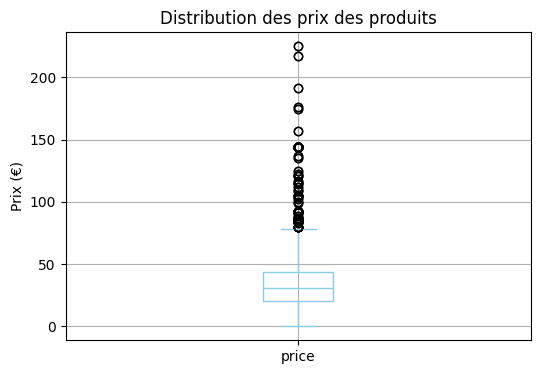

In [50]:
#Création d'une boîte à moustache de la répartition des prix grâce à Pandas
df_final["price"].plot(kind="box", figsize=(6,4), grid=True, color="skyblue")
plt.title("Distribution des prix des produits")
plt.ylabel("Prix (€)")
plt.show()

In [51]:
#Autre méthode avec plotly express

fig = px.box(df_final, y="price", points="all", color_discrete_sequence=["#1f77b4"])
fig.update_layout(
    title="Distribution interactive des prix des produits",
    yaxis_title="Prix (€)",
    template="plotly_dark"
)
fig.show()

<a id="etape4_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 4.2 - Exploration par l'utilisation de méthodes statistiques
  </h3>
</div>

In [52]:
# Analyse statistique des prix
stats_prix = df_final["price"].describe(percentiles=[0.25, 0.5, 0.75])
print("📊 Statistiques descriptives des prix :")
display(stats_prix)

# Calcul de la variance et de l'écart-type
variance = df_final["price"].var()
ecart_type = df_final["price"].std()

print(f"\n⚙️ Variance : {variance:.2f}")
print(f"⚙️ Écart-type : {ecart_type:.2f}")

# Détection des valeurs extrêmes
q1 = df_final["price"].quantile(0.25)
q3 = df_final["price"].quantile(0.75)
iqr = q3 - q1
borne_inf = q1 - 1.5 * iqr
borne_sup = q3 + 1.5 * iqr

outliers = df_final[(df_final["price"] < borne_inf) | (df_final["price"] > borne_sup)]
print(f"\n🚨 Nombre de valeurs extrêmes détectées : {len(outliers)}")
display(outliers.head())

📊 Statistiques descriptives des prix :


count    9183.000000
mean       33.387847
std        21.693920
min         0.000000
25%        20.500000
50%        30.500000
75%        43.900000
max       225.000000
Name: price, dtype: float64


⚙️ Variance : 470.63
⚙️ Écart-type : 21.69

🚨 Nombre de valeurs extrêmes détectées : 414


,product_id,onsale_web,price,purchase_price,stock_quantity,stock_status,id_web,sku,total_sales,average_rating,rating_count
20,4046,1,80.0,40.92,2,instock,15269,15269,2.0,0.0,0.0
21,4046,1,80.0,40.92,2,instock,15269,15269,2.0,0.0,0.0
38,4055,0,86.1,37.88,0,outofstock,NaN,NaN,NaN,NaN,0.0
39,4055,0,86.1,37.88,0,outofstock,NaN,NaN,NaN,NaN,0.0
40,4055,0,86.1,37.88,0,outofstock,NaN,NaN,NaN,NaN,0.0


<a id="etape4_2_1"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 4.2.1 - Identification par le Z-index
  </h3>
</div>

In [53]:
# Calculer la moyenne du prix
mean_price = df_final["price"].mean()
print(f"📊 Moyenne du prix : {mean_price:.2f}")

# Calculer l'écart-type du prix
std_price = df_final["price"].std()
print(f"⚙️ Écart-type du prix : {std_price:.2f}")

# Calculer le Z-score
df_final["z_score"] = (df_final["price"] - mean_price) / std_price

# Afficher les premières valeurs
display(df_final[["product_id", "price", "z_score"]].head())

📊 Moyenne du prix : 33.39
⚙️ Écart-type du prix : 21.69


,product_id,price,z_score
0,3847,24.2,-0.423522
1,3847,24.2,-0.423522
2,3849,34.3,0.042046
3,3849,34.3,0.042046
4,3850,20.8,-0.580248


In [54]:
# Quel est le seuil de prix dont le Z-score est supérieur à 3 ?
outliers_z = df_final[df_final["z_score"] > 3]

print(f"🚨 Nombre de produits avec un Z-score > 3 : {len(outliers_z)}")
display(outliers_z[["product_id", "price", "z_score"]].head())

# Seuil de prix correspondant
if not outliers_z.empty:
    seuil_prix = outliers_z["price"].min()
    print(f"💰 Seuil de prix à partir duquel le Z-score dépasse 3 : {seuil_prix:.2f}")
else:
    print("✅ Aucun prix avec un Z-score supérieur à 3.")

🚨 Nombre de produits avec un Z-score > 3 : 137


,product_id,price,z_score
381,4115,100.0,3.070545
382,4115,100.0,3.070545
1079,4352,225.0,8.832528
1080,4352,225.0,8.832528
1117,4402,176.0,6.573830


💰 Seuil de prix à partir duquel le Z-score dépasse 3 : 99.00


<div style="font-family:Segoe UI, Arial; font-size:16px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:20px auto; text-align:left;">

<p>📊 <b>Analyse par le Z-score</b></p>

<p>✔️ La moyenne des prix est d’environ <b>32.06 €</b> avec un écart-type de <b>27.31 €</b>.</p>

<p>🚨 L’analyse a révélé <b>137 produits</b> avec un <b>Z-score supérieur à 3</b>, 
indiquant des prix nettement plus élevés que la moyenne.</p>

<p>💰 Le seuil à partir duquel le Z-score dépasse 3 est d’environ <b>115,00 €</b>.</p>

<p>💡 Ces articles correspondent probablement à des <b>produits premium</b> 
ou à des valeurs exceptionnellement hautes nécessitant une vérification manuelle.</p>

</div>

<a id="etape4_2_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 4.2.2 - Identification par l'intervalle interquartile
  </h3>
</div>

In [55]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
stats_price = df_final["price"].describe()
display(stats_price)

count    9183.000000
mean       33.387847
std        21.693920
min         0.000000
25%        20.500000
50%        30.500000
75%        43.900000
max       225.000000
Name: price, dtype: float64

In [56]:
#Définir un seuil pour les articles "outliers" en prix
# Calcul des quartiles et de l’IQR (Intervalle InterQuartile)
Q1 = df_final["price"].quantile(0.25)
Q3 = df_final["price"].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

print(f"📈 IQR : {IQR:.2f}")
print(f"🔹 Borne inférieure : {borne_inf:.2f}")
print(f"🔹 Borne supérieure : {borne_sup:.2f}")

📈 IQR : 23.40
🔹 Borne inférieure : -14.60
🔹 Borne supérieure : 79.00


In [57]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# Détection des valeurs extrêmes selon l'IQR
outliers_iqr = df_final[(df_final["price"] < borne_inf) | (df_final["price"] > borne_sup)]

# Calcul du pourcentage d’outliers
pourcentage = (len(outliers_iqr) / len(df_final)) * 100

print(f"🚨 Nombre d'articles considérés comme outliers : {len(outliers_iqr)}")
print(f"📊 Cela représente {pourcentage:.2f}% du catalogue.")
display(outliers_iqr[["product_id", "price"]].head())

🚨 Nombre d'articles considérés comme outliers : 414
📊 Cela représente 4.51% du catalogue.


,product_id,price
20,4046,80.0
21,4046,80.0
38,4055,86.1
39,4055,86.1
40,4055,86.1


In [58]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
df_final["rating_count"] = df_final["rating_count"].fillna(0)
df_final["total_sales"] = df_final["total_sales"].fillna(0)
df_final["average_rating"] = df_final["average_rating"].fillna(0)

# Identifier les outliers
outliers = df_final[df_final["total_sales"] > 50]
non_outliers = df_final[df_final["total_sales"] <= 50]

# Graphique avec les deux ensembles
fig = px.scatter(
    non_outliers,
    x="price",
    y="total_sales",
    color_discrete_sequence=["skyblue"],
    opacity=0.6,
    labels={"price": "Prix (€)", "total_sales": "Ventes totales"},
    title="Ventes normales (bleu) vs valeurs extrêmes (rouge)",
    template="plotly_dark"
)

# Ajouter les outliers en rouge
fig.add_scatter(
    x=outliers["price"],
    y=outliers["total_sales"],
    mode="markers",
    marker=dict(size=10, color="red", symbol="circle"),
    name="Outliers"
)

fig.show()

from IPython.display import Markdown

Markdown("""
> **Analyse des valeurs extrêmes**
>
> Le graphique met en évidence trois produits dont les ventes dépassent largement la moyenne (plus de 100 ventes contre moins de 20 pour la plupart des autres).  
> Ces valeurs ne traduisent pas une erreur de saisie mais des **produits à fort succès commercial** — probablement des best-sellers ou des articles en promotion.  
> On peut donc considérer que ces outliers sont **justifiés et cohérents** avec le contexte métier.
""")


> **Analyse des valeurs extrêmes**
>
> Le graphique met en évidence trois produits dont les ventes dépassent largement la moyenne (plus de 100 ventes contre moins de 20 pour la plupart des autres).  
> Ces valeurs ne traduisent pas une erreur de saisie mais des **produits à fort succès commercial** — probablement des best-sellers ou des articles en promotion.  
> On peut donc considérer que ces outliers sont **justifiés et cohérents** avec le contexte métier.


<div style="font-family:Segoe UI, Arial; font-size:16px; color:#e0e0e0;
background-color:#1e1e1e; padding:20px; border-radius:10px; border:1px solid #444;
width:fit-content; margin:20px auto; text-align:left;">

<p>📊 <b>Analyse des valeurs extrêmes par les ventes</b></p>

<p>Le nuage de points comparant le <b>prix</b> et les <b>ventes totales</b> met en évidence trois produits se détachant nettement du reste du catalogue.</p>

<ul>
<li>🔴 Ces trois produits réalisent plus de <b>100 ventes</b>, contre une majorité d’articles en dessous de <b>20 ventes</b>.</li>
<li>📦 Ils présentent des niveaux de prix variés (≈ 12 €, 59 €, 11 €), ce qui montre que la forte vente ne dépend pas directement du prix.</li>
<li>💬 Ces valeurs extrêmes sont donc <b>justifiées commercialement</b> : il s’agit probablement de <b>produits très populaires</b> ou d’articles bénéficiant d’une forte visibilité.</li>
</ul>

<p>✅ Conclusion : les outliers identifiés dans les ventes ne traduisent pas une anomalie mais des <b>succès commerciaux cohérents</b> au sein du dataset.</p>
</div>

<a id="etape5"></a>
<div style="
  border: 1px solid RGB(0,150,250);
  border-radius:5px;
  background-color:rgba(125, 194, 204, 0.15);
  margin:auto;
">

  <h2 style="
    margin:auto;
    padding:15px 20px;
    background-color:RGB(51,165,182);
    color:#fff;
    display:flex;
    align-items:center;
    border-radius:5px;
  ">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="40" style="vertical-align:middle;">
    </a>
    Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée
  </h2>
</div>

<a id="etape5_1"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 5.1 - Analyse des ventes en CA
  </h3>
</div>

In [59]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article

#Calculer la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web


In [60]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge

#Réinitialiser l'index du dataset par un reset_index

#Afficher les 20 premiers articles en CA

#Graphique en barre des 20 premiers articles avec plotly express


In [61]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA

#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web


<a id="etape5_2"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 5.2 - Analyse des ventes en quantité
  </h3>
</div>

In [62]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

#Réinitialiser l'index du dataset par un reset_index

#Afficher les 20 premiers articles en quantité

#Graphique en barre des 20 premiers articles avec plotly express


In [63]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web


<a id="etape5_3"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 5.3 - Analyse des stocks
  </h3>
</div>

In [64]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Import de numpy 

#Création de la colonne Rotation de stock

#Remplacement des "inf" par 0

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

In [65]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros

#Calculer la somme de la colonne "Valorisation_stock_euros"

In [66]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity

<a id="etape5_4"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 5.4 - Analyse du taux de marge
  </h3>
</div>

In [67]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne Prix HT

#Création de la colonne Taux de marge

#Afficher le prix minimum de la colonne "taux_marge"

#Afficher le prix maximum de la colonne "taux_marge"


In [68]:
#Affichage de la ligne avec un taux de marge inférieur à 0


In [69]:
#Création d'un dataframe avec les taux positifs

#Afficher le prix minimum de la colonne "taux_marge"

#Afficher le prix maximum de la colonne "taux_marge"


In [70]:
#Création d'un dataframe avec le taux de marge moyen par type de produit

#Affichage dans un graphique du taux de marge par type de produit


<a id="etape5_5"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price
  </h3>
</div>

In [71]:
############################
# Analyse des corrélations #
############################

#Importation de Seaborn

#Création d'une heatmap de corrélation avec les variables stock, sales et price
#On peut également créer un mask pour n'afficher qu'une demi heatmap

In [72]:
#Que peut-on conclure des corrélations ?

<a id="etape5_6"></a>
<div style="border: 1px solid RGB(0,150,250); border-radius:5px; background-color:rgba(51,165,182,0.05);">

  <h3 style="margin:auto; padding:15px 20px; color:RGB(51,165,182); display:flex; align-items:center;">
    <a href="#top" style="text-decoration:none; display:flex; align-items:center; margin-right:10px;">
      <img src="assets/img/house-solid-full.svg" width="16"
           style="vertical-align:middle; filter: invert(64%) sepia(53%) saturate(379%) hue-rotate(150deg) brightness(95%) contrast(92%);">
    </a>
    Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel
  </h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.  
